In [10]:
# 필요한 라이브러리 임포트
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

import os 
os.getcwd()
os.chdir('C:\\Users\\jangs\\archive')

# data frame, target: MEDV가 포함 되어있음
boston = pd.read_excel('boston.xlsx')


# 계량 데이터 예제 

In [11]:
boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [12]:
boston.describe() #자료형 통계 데이터 확인 

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [13]:
boston.isna().sum()#결측치 확인 

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [14]:
boston.dtypes #자료형 확인 

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX          int64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

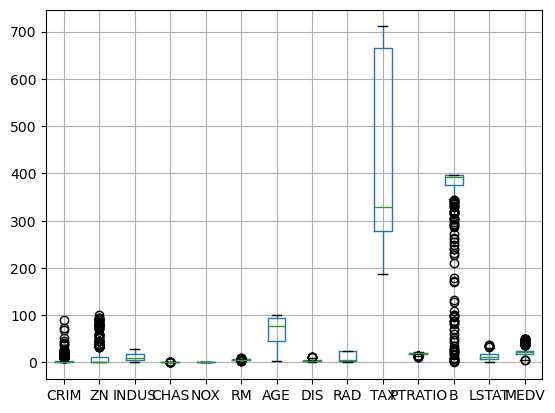

In [16]:
# scailing 여부 확인 ==> yes 필요; 
boston.boxplot()
plt.show()

# 범주형과 다르게 계량데이터의 y-value의 분포는  spectrum으로 편성 되어있음 ==> resample 필요X

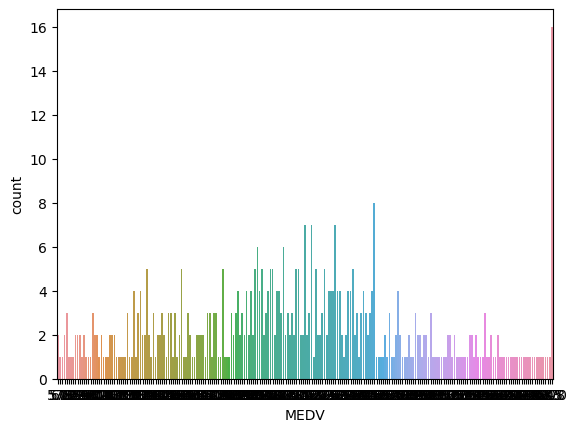

In [17]:
# resample 여부 확인  #계량 데이터... how?!
sns.countplot(x=boston.MEDV)
plt.show()

In [127]:
#x, y 분리 
y = boston.MEDV
x = boston.drop('MEDV', axis=1)

In [128]:
#scailing 
#standard scailing방법 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)


In [129]:
# train / test 분리 
from sklearn.model_selection import train_test_split
x_train, x_test , y_train , y_test = train_test_split(x_scaled, y, test_size=.2, random_state=3)

In [25]:
x_train

array([[ 0.68661446, -0.48772236,  1.01599907, ...,  0.80657583,
        -3.83745999,  0.84902374],
       [ 0.04944541, -0.48772236,  1.01599907, ...,  0.80657583,
         0.42383789,  0.03040885],
       [-0.41620579,  0.370669  , -1.13908197, ..., -1.64394538,
         0.38984838, -1.13023008],
       ...,
       [-0.39832155,  0.45650813, -0.76993132, ...,  0.29797709,
         0.40640456, -0.85408773],
       [-0.28941366, -0.48772236,  1.2319449 , ..., -1.73641788,
        -0.14685696, -0.07472149],
       [ 0.00752893, -0.48772236,  1.01599907, ...,  0.80657583,
         0.26441612, -0.34525689]])

In [70]:
# 데이터 학습 , 평가 
from sklearn.linear_model import LinearRegression 
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from  sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
model_lst = [LinearRegression (), DecisionTreeRegressor(), RandomForestRegressor()]


In [40]:
#데이터 학습 
from sklearn.model_selection import cross_val_score
score_lst = []
cv_lst = []

for model in model_lst:
    model.fit(x_train, y_train)
    score_lst.append(model.score(x_test, y_test))
    cv_lst.append(cross_val_score(model, x_test, y_test, cv=10, scoring='accuracy'))

C:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:794: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\anaconda\Lib\site-packages\sklearn\metrics\_scorer.py", line 115, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\anaconda\Lib\site-packages\sklearn\metrics\_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\anaconda\Lib\site-packages\sklearn\utils\_param_validation.py", line 192, in wrapper
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^
  File "C:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py", line 221, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true,

C:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:794: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\anaconda\Lib\site-packages\sklearn\metrics\_scorer.py", line 115, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\anaconda\Lib\site-packages\sklearn\metrics\_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\anaconda\Lib\site-packages\sklearn\utils\_param_validation.py", line 192, in wrapper
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^
  File "C:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py", line 221, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true,

C:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:794: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\anaconda\Lib\site-packages\sklearn\metrics\_scorer.py", line 115, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\anaconda\Lib\site-packages\sklearn\metrics\_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\anaconda\Lib\site-packages\sklearn\utils\_param_validation.py", line 192, in wrapper
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^
  File "C:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py", line 221, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true,

In [41]:
score_lst 

[0.7952617563243858, 0.8272903987645627, 0.914341210521761]

#  linear regression의 특징!!!

In [42]:
lr_model = LinearRegression()
lr_model.fit(x_train, y_train) 

# ***범주 데이터를 다루는 model와 다르게; 만들어진 model의 함수를 확인할수있음*** 
lr_model.intercept_ #linear regression model 함수에서 계수/ y절편 값
lr_model.coef_, boston.columns #해당 컬럼들의 기울기 값이 됨

(array([-1.06465695,  1.1226183 , -0.32520041,  0.85495878, -1.81326121,
         2.52284545, -0.26242718, -3.09420803,  2.65355435, -1.8250863 ,
        -1.96553863,  0.91526504, -3.40801729]),
 Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
        'PTRATIO', 'B', 'LSTAT', 'MEDV'],
       dtype='object'))

In [43]:
lr_model.score(x_test, y_test)

0.7952617563243858

In [52]:
# 10겹 교차검증 (r2) ===> r2의 역할 : 계수 데이터 모델의 평가 지표 
lr_cv = cross_val_score(lr_model, x_test, y_test, cv=10, scoring='r2')
lr_cv

array([0.85472443, 0.85122335, 0.91867285, 0.21978121, 0.00330168,
       0.65847559, 0.61638338, 0.52415355, 0.62578169, 0.86460394])

In [53]:
# 평균, 표준편차 테이블로 비교
lr_cv.mean(), lr_cv.std()

(0.6137101680174188, 0.2843248242052198)

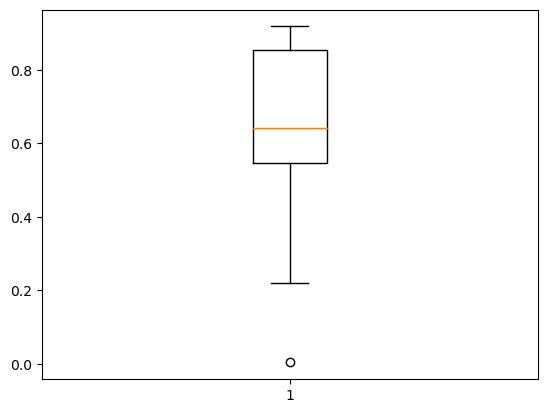

In [54]:
# 박스플랏으로 비교
plt.boxplot(lr_cv)
plt.show()

In [130]:
#함수로 train하는 방법: 반복되는 과정의 묶음 
def evaluate_model(model, x_train, y_train, x_test, y_test):
    model.fit(x_train, y_train) #훈련데이터로 학습  
    score = model.score(x_test, y_test) # 모델평가 (r2_score)
    print('r2 =', score)
    cv = cross_val_score(model, x_test, y_test, cv=10, scoring='r2') # 10겹 교차검증 (r2)
    print(cv)
    return score, cv

In [131]:
#함수 적용하여 사용방법 

In [132]:
score_lst = []
cv_lst = []

In [154]:
# 회귀분석
lr_model = LinearRegression()
lr_score, lr_cv = evaluate_model(lr_model, x_train, y_train, x_test, y_test)
lr_score, lr_cv

score_lst.append(lr_score)
#cv_lst.append(lr_cv)

r2 = 0.7952617563243858
[0.85472443 0.85122335 0.91867285 0.21978121 0.00330168 0.65847559
 0.61638338 0.52415355 0.62578169 0.86460394]


In [155]:
#의사결정 트리
dt_model = DecisionTreeRegressor()
dt_score, dt_cv = evaluate_model(dt_model, x_train, y_train, x_test, y_test)
dt_score, dt_cv

score_lst.append(dt_score)
#cv_lst.append(dt_cv)

r2 = 0.8285414368682272
[0.70008304 0.61296734 0.31817306 0.78350282 0.26344552 0.90410556
 0.46256659 0.15396367 0.28723057 0.92142634]


In [156]:
#랜덤 포레스트
rf_model = RandomForestRegressor()
rf_score, rf_cv = evaluate_model(rf_model, x_train, y_train, x_test, y_test)
rf_score, rf_cv

score_lst.append(rf_score)
#cv_lst.append(rf_cv)

r2 = 0.9071472776175296
[0.87562276 0.79823304 0.7245369  0.55882338 0.58295246 0.93979451
 0.79401766 0.75769936 0.83449502 0.87512526]


In [157]:
#knn: 최근접 이웃법
# 최근접이웃법
knn = KNeighborsRegressor()
knn_score, knn_cv = evaluate_model(knn,x_train, y_train, x_test, y_test)

score_lst.append(knn_score)
#cv_lst.append(knn_cv)

r2 = 0.6726454086435848
[0.92579664 0.63841206 0.69567241 0.65494985 0.20761971 0.67299787
 0.39090978 0.04253175 0.87609286 0.76324038]


In [158]:
# svm: 서포트 벡터 머신
# 서포트벡터머신
svm = SVR()
svm_score, svm_cv = evaluate_model(svm,x_train, y_train, x_test, y_test)

score_lst.append(svm_score)
cv_lst.append(svm_cv)

r2 = 0.7203794031588009
[0.53681866 0.29537975 0.6119262  0.6821602  0.63315776 0.09379094
 0.23055266 0.47590014 0.6290081  0.21960417]


In [160]:
# 알고리즘 별로, score, cv값 저장 
#score_lst = score_lst[4:]
#cv_lst

In [161]:
score_lst

[0.7952617563243858,
 0.8285414368682272,
 0.9071472776175296,
 0.6726454086435848,
 0.7203794031588009]

In [150]:
#cv_lst = cv_lst[4:] 

In [163]:
cv_lst

[array([0.85472443, 0.85122335, 0.91867285, 0.21978121, 0.00330168,
        0.65847559, 0.61638338, 0.52415355, 0.62578169, 0.86460394]),
 array([0.86767298, 0.61045464, 0.28948412, 0.50105372, 0.29953158,
        0.88852141, 0.7922131 , 0.48748251, 0.25367253, 0.89118107]),
 array([0.89026897, 0.79373133, 0.74109668, 0.5400923 , 0.53439841,
        0.92823922, 0.8133527 , 0.71658123, 0.83482632, 0.87423649]),
 array([0.92579664, 0.63841206, 0.69567241, 0.65494985, 0.20761971,
        0.67299787, 0.39090978, 0.04253175, 0.87609286, 0.76324038]),
 array([0.53681866, 0.29537975, 0.6119262 , 0.6821602 , 0.63315776,
        0.09379094, 0.23055266, 0.47590014, 0.6290081 , 0.21960417])]

In [164]:
# 결정계수 테이블 
score_df = pd.DataFrame(score_lst)
score_df.index = ['LR', 'DT', 'RF', 'KNN', 'SVM']
score_df.columns = ['r2']

TypeError: 'dict' object is not callable

In [94]:
#결과값을 리스트로 묶음
score_df

,r2
LR,0.795262
DT,0.836949
RF,0.917347
KNN,0.672645
SVM,0.720379


In [99]:
#평균, 표준편차 테이블로 비교
cv_df = pd.DataFrame(cv_lst, index=score_df.index).T
cv_summary = pd.DataFrame = ({'mean': cv_df.mean(),
                             'std': cv_df.std()})

TypeError: 'dict' object is not callable

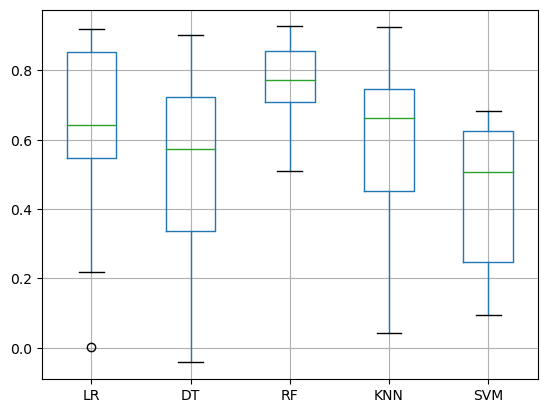

In [165]:
cv_df.boxplot()
plt.show()

In [166]:
cv_summary

{'mena': LR     0.613710
 DT     0.523635
 RF     0.763220
 KNN    0.586822
 SVM    0.440830
 dtype: float64,
 'std': LR     0.299705
 DT     0.306042
 RF     0.132118
 KNN    0.285717
 SVM    0.212160
 dtype: float64}

In [167]:
# fine tuning : 최종으로 선택한 모델 테스트전 단계 
from sklearn.model_selection import GridSearchCV

params = { 'n_estimators' : [10, 100],
           'max_depth' : [6, 8, 10, 12],
           'min_samples_leaf' : [8, 12, 18],
           'min_samples_split' : [8, 16, 20]
            }

# GridSearchCV 수행
rf = RandomForestRegressor(random_state = 0, n_jobs = -1) #n_jobs = -1 : 데이터 연산을 가속시키는 명령어
grid_cv = GridSearchCV(rf, param_grid = params, cv = 3, n_jobs = -1)
grid_cv.fit(x_train, y_train)

print('최적 하이퍼 파라미터: ', grid_cv.best_params_)
print('최고 예측 정확도: {:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터:  {'max_depth': 10, 'min_samples_leaf': 8, 'min_samples_split': 16, 'n_estimators': 10}
최고 예측 정확도: 0.7963


In [107]:
#테스트 데이터를 이용하여 예측 
rf = RandomForestRegressor(max_depth=8, min_samples_leaf=8, min_samples_split= 16, n_estimators= 10)
rf.fit(x_train, y_train)

RandomForestRegressor(max_depth=8, min_samples_leaf=8, min_samples_split=16,
                      n_estimators=10)

In [109]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [170]:
x.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [179]:
# 테스트 데이터를 이용하여 예측 !!!! 다시 

test1_data = pd.DataFrame({'CRIM': 0.02,
    'ZN': 0,
    'INDUS': 7,
    'CHAS': 0,
    'NOX': .5,
    'RM': 4,
    'AGE': 45,
    'DIS': 5,
    'RAD': 2,
    'TAX': 250,
    'PTRATIO': 16,
    'B': 397,
    'LSTAT': 5
},index=[0])

TypeError: 'dict' object is not callable

In [172]:
test_data

NameError: name 'test_data' is not defined

In [ ]:
# 스케일링
test_data_scaled = scaler.transform(test_data)

In [ ]:
rf

In [180]:
#최소제곱법 계산: 오류가 최소가 되도록하는 함수 모젤을 구하는 방법 
x = np.array([100,50,100,100,50,80,75,65,90,90])
y = np.array([9.3,4.8,8.9,6.5,4.2,6.2,7.4,6,7.6,6.1])

print('means', x.mean(), y.mean())
print('std', x.std(), y.std())
slope = ((x - x.mean())*(y - y.mean())).sum() / ((x - x.mean())**2).sum() #기울기
intercept = y.mean() - slope * x.mean()
print(slope, intercept)

#다음 회귀분석 식 : y = 0.06782608695652174* x + 1.2739130434782604 (예측식) 

means 80.0 6.7
std 18.57417562100671 1.5459624833740306
0.06782608695652174 1.2739130434782604


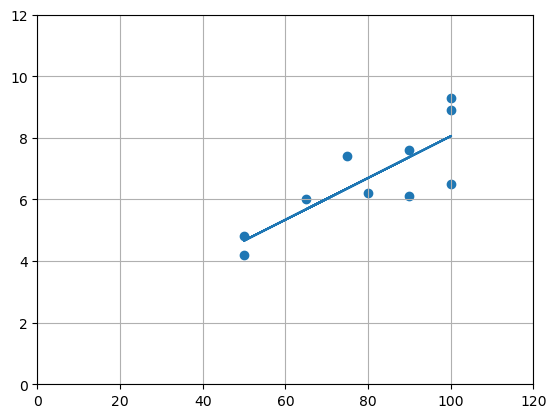

In [181]:
y_pred = 0.06782608695652174* x + 1.2739130434782604


plt.scatter(x,y)
plt.grid()
plt.xlim(0,120)
plt.ylim(0,12)

# 모델로 생성한 그래프 개형 
plt.plot(x, y_pred)

plt.show()

In [182]:
#결정계수 계산 
error =  y - y_pred
SSE = (error**2).sum()
SST = ((y-y.mean())**2).sum()
SSR = SST - SSE
SSR/SST #0.6640713116245224 >> 66%의 설명력(=정확도)을 갖는 모델

0.6640713116245224

# 변수선택법 

In [186]:
from sklearn.model_selection SelectKBest, f_classif
test = SelectKBest(score_func=f_classif, k=4)
fit = test.fit(x_train, y_train)
#fit.scores

SyntaxError: invalid syntax (4040654606.py, line 1)

# 강의 중간에 놓쳤으므로 vs-code 확인할것

In [189]:
#RFE
pima = pd.read_csv('pima-indians-diabetes.csv', header=None)
pima.columns = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
pima.head()

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [190]:
y = pima['class']
x = pima.drop('class', axis=1)

In [195]:
#RFE : 모델 생성에 큰 영향을 주는 변수 알려주는 함수 

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()
fit = RFE(log_model).fit(x, y)
fit.n_features_ #추천해주는 변수갯수 : default: 4
fit.support_ #변수선택
fit.ranking_ #변수랭킹

C:\anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([1, 1, 3, 4, 5, 1, 1, 2])

In [197]:
print('추천변수 갯수: ', fit.n_features_) #추천해주는 변수갯수
print('선택변수: ', fit.support_) #변수선택
print('변수랭킹: ', fit.ranking_) #변수랭킹

추천변수 갯수:  4
선택변수:  [ True  True False False False  True  True False]
변수랭킹:  [1 1 3 4 5 1 1 2]


In [204]:
sns.barplot(x=fit.ranking_, y= pima.columns[:-1]) #숫자가 적은 변수가 중요한 변수
plt.show()

TypeError: 'dict' object is not callable

In [198]:
sns.barplot(x=fit.ranking_, y=pima.columns[:-1]) #숫자가 적은 변수가 중요한 변수
plt.show()

TypeError: 'dict' object is not callable

# 아프리카 심장병 예측 ('범주 데이터' 문제)

In [2]:
# 필요한 라이브러리 임포트
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

import os 
os.getcwd()
os.chdir('C:\\Users\\jangs\\archive')

# data frame, target: MEDV가 포함 되어있음
heart_dis = pd.read_csv('SAheart.csv')

In [3]:
#데이터 확인하기 
heart_dis.shape #(462, 10)

(462, 10)

In [4]:
heart_dis.dtypes

sbp            int64
tobacco      float64
ldl          float64
adiposity    float64
famhist       object
typea          int64
obesity      float64
alcohol      float64
age            int64
chd           object
dtype: object

In [5]:
heart_dis.isna().sum()

sbp          0
tobacco      0
ldl          0
adiposity    0
famhist      0
typea        0
obesity      0
alcohol      0
age          0
chd          0
dtype: int64

In [6]:
heart_dis.head()

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,Si
1,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,Si
2,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,No
3,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,Si
4,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,Si


In [7]:
heart_dis.chd.value_counts()

No    302
Si    160
Name: chd, dtype: int64

# 범주 >> 계량 

In [8]:
#인토딩 
#chd >> 심장 질환 여부: [양성: 1 , 음성: 0]

#hint code # 
#대출여부 인코딩 (수치화 데이터로 바꾸어야 연산이 가능)
#loan.head()
#loan.Loan_Status.replace({'Y':1, 'N':0}, inplace=True) #알파벳 순서
#loan.head()

heart_dis.chd.replace({'Si': 1, 'No': 0}, inplace=True)
#heart_dis['chd'] = heart_dis.loc[heart_dis.chd == 'Si', 'chd'] = 1
heart_dis.tail()

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
457,214,0.4,5.98,31.72,Absent,64,28.45,0.00,58,0
458,182,4.2,4.41,32.10,Absent,52,28.61,18.72,52,1
459,108,3.0,1.59,15.23,Absent,40,20.09,26.64,55,0
460,118,5.4,11.61,30.79,Absent,64,27.35,23.97,40,0
461,132,0.0,4.82,33.41,Present,62,14.70,0.00,46,1


In [9]:
heart_dis.famhist.value_counts()

Absent     270
Present    192
Name: famhist, dtype: int64

In [10]:
heart_dis.famhist.replace({'Absent': 0, 'Present': 1}, inplace=True)
#heart_dis['chd'] = heart_dis.loc[heart_dis.chd == 'Si', 'chd'] = 1
heart_dis.dtypes

sbp            int64
tobacco      float64
ldl          float64
adiposity    float64
famhist        int64
typea          int64
obesity      float64
alcohol      float64
age            int64
chd            int64
dtype: object

In [11]:
heart_dis.dtypes

sbp            int64
tobacco      float64
ldl          float64
adiposity    float64
famhist        int64
typea          int64
obesity      float64
alcohol      float64
age            int64
chd            int64
dtype: object

In [338]:
heart_dis.chd.value_counts()

0    302
1    160
Name: chd, dtype: int64

In [375]:
y = heart_dis.chd
type(y)

pandas.core.series.Series

In [318]:
type(heart_dis.chd)

pandas.core.series.Series

In [373]:
#x, y split 
#x, y 분리 
#y = heart_dis.chd

y = heart_dis.chd
#y = heart_dis.drop(['sbp', 'tobacco', 'ldl', 'adiposity', 'famhist', 'typea', 'obesity',
#       'alcohol', 'age'],axis=1)
x = heart_dis.drop('chd', axis=1)

In [377]:
#•Train and test split 훈련, 테스트데이터 분리
from sklearn.model_selection import train_test_split
x_train, x_test , y_train , y_test = train_test_split(x_scaled, y, test_size=.2, random_state=3)  #autocompletion; Jupiter에서는 'tab'


In [379]:
# resample 여부 확인 
y_train.value_counts()

0    244
1    125
Name: chd, dtype: int64

In [380]:
#resample 
from imblearn.over_sampling import RandomOverSampler
rus = RandomOverSampler()
x_rus, y_rus = rus.fit_resample(x_train, y_train)

In [382]:
y_rus.value_counts()

0    244
1    244
Name: chd, dtype: int64

In [383]:
#모델학습 
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from  sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [384]:
# LogisticRegression  학습

lr_model = LogisticRegression()
lr_model.fit(x_rus, y_rus)


LogisticRegression()

In [387]:
#정학도 평가 
lr_model.score(x_test, y_test)
#cv_lst.append(cross_val_score(model, x_test, y_test, cv=10, scoring='accuracy'))

0.6881720430107527

In [389]:
#Cross-validaition 
cross_val_score(lr_model, x_test, y_test, cv=10, scoring='accuracy')

array([0.8       , 0.7       , 0.8       , 0.88888889, 0.77777778,
       0.88888889, 0.55555556, 0.44444444, 0.66666667, 0.66666667])

In [390]:
cross_val_score(lr_model, x_test, y_test, cv=10, scoring='accuracy').mean()

0.718888888888889

#  순서 뒤집힘 

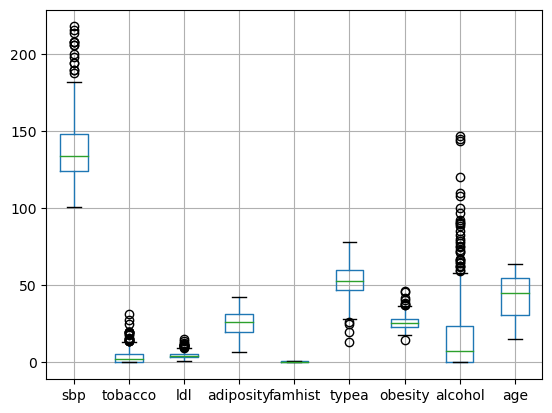

In [281]:
x.boxplot()
plt.show()

In [295]:
#scailing 
#standard scailing방법 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)


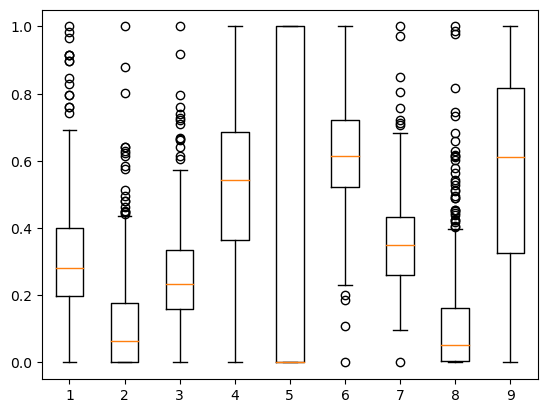

In [364]:
plt.boxplot(x_scaled)
plt.show()

In [19]:
#•Train and test split 훈련, 테스트데이터 분리
from sklearn.model_selection import train_test_split
x_train, x_test , y_train , y_test = train_test_split(x_scaled, y, test_size=.2, random_state=3)  #autocompletion; Jupiter에서는 'tab'

NameError: name 'x_scaled' is not defined

NameError: name 'x_test' is not defined